<a id='toc'></a>
<center><h1>The Battle of Neighborhood II</font></h1></center>
<center>Madrid Rent Apartment neighborhood review </center>  


# 0. Table of Contents
- 1_    [Introduction](#introduction)
- 2_    [Objectives](#objective)
- 3_    [Requiered Libs](#libs)    
- 4_    [Data](#data)
- 4.1_  [Data. Import Credentials to IBM WATSON Notebook](#data_credentials)
- 4.2_  [Data. Import pandas dataframe](#data_pandas)
- 5_    [Methodology](#methodology)
- 6_    [Foursquare. Credentials and version](#foursquare)
- 7_    [Madrid](#madrid)
- 7.1_  [Madrid: Analyzing and visualization rent apartment price increase per square meter between 2018-2019](#amadrid)
- 7.2_  [Madrid: Getting coordinates and plot the map](#cmadrid) 
- 7.3_  [Madrid: Plotting all neighbourhood into map](#nmadrid) 
- 7.4_  [Madrid: Exploring the neigborhoods](#emadrid)
- 7.5_  [Madrid: Clustering the neigborhood](#kmadrid)         
- 8_    [Results](#results)
- 9_    [Discussion](#discussion)
- 10_   [Conclusion](#conclusion)

<a id='introduction'></a>
# 1. Introduction

- <b>Madrid</b> is the capital of Spain and the largest municipality in both the Community of Madrid and Spain as a whole. The city has almost 3.3 million inhabitants and a metropolitan area population of approximately 6.5 million. It is the third-largest city in the European Union (EU), smaller than only London and Berlin, and its monocentric metropolitan area is the third-largest in the EU, smaller only than those of London and Paris.The municipality covers 604.3 km2 (233.3 sq mi). The Madrid urban agglomeration has the third-largest GDP in the European Union and its influence in politics, education, entertainment, environment, media, fashion, science, culture, and the arts all contribute to its status as one of the world's major global cities. Madrid is home to two world-famous football clubs, Real Madrid and Atlético Madrid. Due to its economic output, high standard of living, and market size, Madrid is considered the leading economic hub of the Iberian Peninsula and of Southern Europe. (source: https://en.wikipedia.org/wiki/Madrid)  





<a id='objective'></a>
# 2. Objective
In this project, we will study in details the area classification using Foursquare data and machine learning segmentation and clustering.
The aim of this project is to segment areas of Madrid based on the most common places captured from Foursquare. 

 We will try to determine, using segmentation, clustering and visualization:

- a. The similarity or dissimilarirty of districts/neigborhood of Madrid
- b. Determine the factors involved in increasing the apartment rental price in Madrid

<a id='libs'></a>
# 3. Requiered Libraries

In [3]:
!pip install folium
import requests                                  # library to handle requests
import pandas as pd                              # library for data analsysis
import numpy as np                               # library to handle data in a vectorized manner
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import folium                                    # plotting library

import types
import ibm_boto3
from botocore.client import Config
from geopy import Nominatim                      # module to convert an address into latitude and longitude values
from IPython.display import Image                # libraries for displaying images
from IPython.core.display import HTML            # libraries for displaying images
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize        # tranforming json file into a pandas dataframe library

 

     |████████████████████████████████| 92kB 306kB/s eta 0:00:01


<a id='data'></a>
# 4. Data

The data acquired from: 

 URLs: https://datos.madrid.es/sites/v/index.jsp?vgnextoid=374512b9ace9f310VgnVCM100000171f5a0aRCRD&buscar=true&Texto=&Sector=vivienda&Formato=&Periodicidad=&orderByCombo=CONTENT_INSTANCE_NAME_DECODE
         
 The data adquired from URL, was restructured for easier manipulation and reading into files:

 - MADRID_RENT_APARMENTS.csv 
     
 This files were uploaded into Github repository:
 
 https://github.com/alcupe/ds_capstone_example


<a id='data_credentials'></a>
## 4.1 Data. Import Credentials to IBM WATSON Notebook


In [4]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-ff6aa9f5-b3fe-4e98-bbf2-af312097ec44',
    'IBM_API_KEY_ID': '6KJAVnk2cpJtasN25yOsAY8axOdBVIvfvAmsHBE0vpJB',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-gb.bluemix.net/oidc/token',
    'BUCKET': 'dscoursera-donotdelete-pr-0vrzjcrfstxmux',
    'FILE': 'MADRID_RENT_APARMENTS.csv'
}


<a id='data_pandas'></a>
## 4.2 Data. Import pandas dataframe


In [5]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_4c4528dd32ec472798b66ad7d2e3df91 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6KJAVnk2cpJtasN25yOsAY8axOdBVIvfvAmsHBE0vpJB',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')


<a id='methodology'></a>
# 5.  Methodology

In [ ]:
- Using Matplotlib Lib to plot barchart to visualization % price increase by year of Madrid districts/neighborhood
- Using Seaborn Lib to plot histogram
- Using the Foursquare API to explore neighborhoods in Madrid 
- Exploring function to get the most common venue categories in each district/neighborhood, and then use this feature to group the neighborhoods into clusters
- K-means clustering algorithm will be use to complete this task.
- Using the Folium library to visualize the neighborhoods in Madrid and Barcelona their emerging clusters.

<a id='foursquare'></a>
# 6.  Foursquare. Credentials and version


In [27]:
CLIENT_ID = 'QL2OMYOY1B24UKBMDUGFY0HY0IKMSQIUCIPLHRK334LUQYZZ'
CLIENT_SECRET = 'K5KVFRWRKBQFTESD24TEQVG2EBWC4DCGO1HYHNS0WUOPFDTA' 
VERSION = '20180604'
LIMIT = 30

<a id='madrid'></a>
# 7.  Madrid


In [7]:
body = client_4c4528dd32ec472798b66ad7d2e3df91.get_object(Bucket='dscoursera-donotdelete-pr-0vrzjcrfstxmux',Key='MADRID_RENT_APARMENTS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# MADRID dataframe
dfm= pd.read_csv(body, encoding='latin-1')
dfm.head()


,City,District,Neighborhood,Postal,Latitude,Longitude,2019,2018
0,Madrid,ARGANZUELA,IMPERIAL,28005,40.405551,-3.714566,15.7,14.6
1,Madrid,ARGANZUELA,ACACIAS,28005,40.402135,-3.703169,15.7,14.6
2,Madrid,ARGANZUELA,PALOS DE MOGUER,28045,40.405575,-3.691397,15.7,14.6
3,Madrid,ARGANZUELA,DELICIAS,28045,40.394283,-3.693473,15.7,14.6
4,Madrid,ARGANZUELA,ATOCHA,28045,40.397445,-3.678352,15.7,14.6


<a id='amadrid'></a>
## 7.1 Madrid: Analyzing and visualization rent apartment price increase per square meter between 2018-2019


In [8]:
print('Madrid has {} district and {} neighbohood.'.format(len(dfm['District'].unique()),dfm.shape[0]))

dfmg = dfm.groupby(["District","2019","2018"])["Neighborhood"].apply(", ".join).reset_index()
dfmg



Madrid has 21 district and 106 neighbohood.


,District,2019,2018,Neighborhood
0,ARGANZUELA,15.7,14.6,"IMPERIAL, ACACIAS, PALOS DE MOGUER, DELICIAS, ..."
1,BARAJAS,11.9,12.3,"TIMON, ALAMEDA DE OSUNA, TIMON"
2,CARABANCHEL,11.9,11.6,"COMILLAS, SAN ISIDRO, OPAÑEL, ABRANTES, PUERTA..."
3,CENTRO,18.4,18.8,"JUSTICIA, UNIVERSIDAD, PALACIO, EMBAJADORES, C..."
4,CHAMARTIN,16.4,16.6,"PROSPERIDAD, CIUDAD JARDIN, EL VISO, NUEVA ESPAÑA"
5,CHAMBERI,18.2,17.7,"RIOS ROSAS, VALLEHERMOSO, TRAFALGAR, ARAPILES"
6,CIUDAD LINEAL,13.7,13.1,"PUEBLO NUEVO, VENTAS, SAN PASCUAL, QUINTANA, C..."
7,FUENCARRAL-EL PARDO,12.3,12.1,"LA PAZ, EL PILAR, VALVERDE, MIRASIERRA, PEÑA G..."
8,HORTALEZA,12.7,13.4,"HELLIN, PINAR DEL REY, APOSTOL SANTIAGO, CANIL..."
9,LATINA,11.8,11.5,"LUCERO, PUERTA DEL ANGEL, LAS AGUILAS, CAMPAME..."


Text(0.5, 0, 'Price increase per square meter')

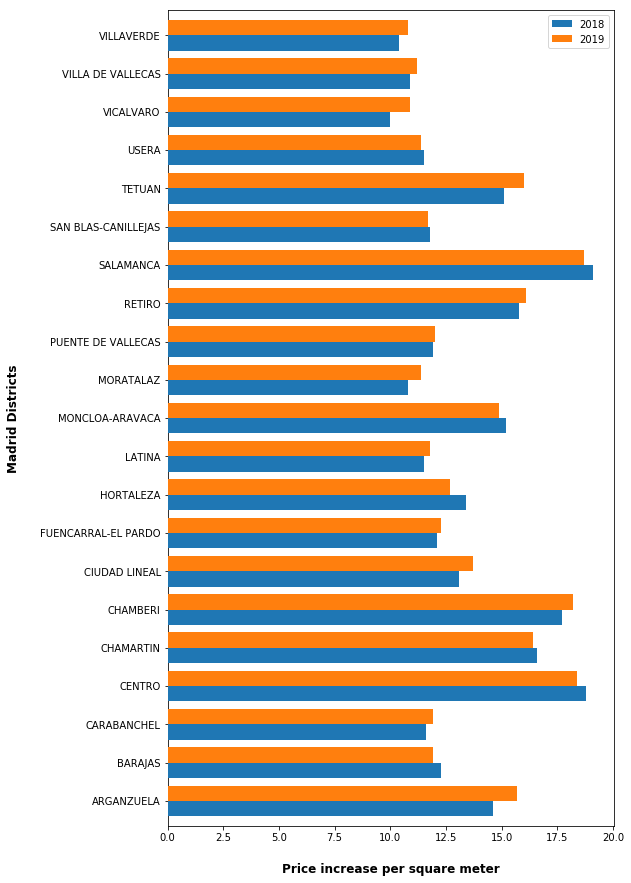

In [9]:
ax = dfmg.plot(kind = 'barh', figsize=(8, 15), zorder=3, width= 0.8, x = 'District', y = ['2018','2019'])
# Set x-axis label
ax.set_ylabel("Madrid Districts", labelpad=20, weight='bold', size=12)
# Set y-axis label
ax.set_xlabel("Price increase per square meter", labelpad=20, weight='bold', size=12)



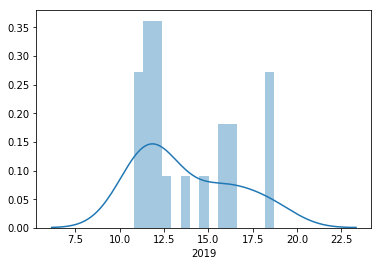

In [12]:
sns.distplot(dfmg['2019'],bins=15)

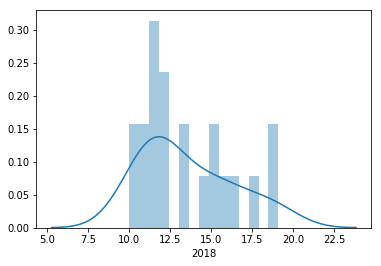

In [13]:
sns.distplot(dfmg['2018'],bins=15)

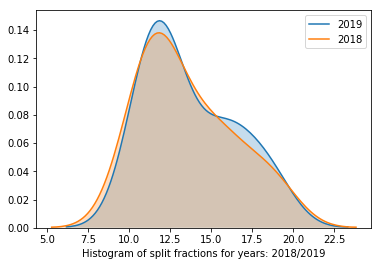

In [18]:
sns.kdeplot(dfmg['2019'], label='2019', shade=True)
sns.kdeplot(dfmg['2018'], label='2018', shade=True)
plt.xlabel('Histogram of split fractions for years: 2018/2019');

<a id='cmadrid'></a>
## 7.2 Madrid: Getting coordinates and plot the map

In [19]:
address = "Madrid"
geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of Madrid:  {}, {}'.format(latitude, longitude))
# create map using latitude and longitude values
madrid_m = folium.Map(location=[latitude, longitude], zoom_start=10)
madrid_m

Coordinates of Madrid:  40.4167047, -3.7035825


<a id='nmadrid'></a>
## 7.3 Madrid: Plotting all neighbourhood into map

In [20]:
for lat, lng, District, Neighborhood in zip(dfm['Latitude'], dfm['Longitude'], dfm['District'], dfm['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, District)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(madrid_m)  
madrid_m

<a id='emadrid'></a>
## 7.4 Madrid: Exploring the neigborhoods


In [28]:
# Get the neighborhood's coordinates
neighborhood_n = dfm.loc[0, 'Neighborhood']
neighborhood_lat = dfm.loc[0, 'Latitude']
neighborhood_lon = dfm.loc[0, 'Longitude']



In [29]:
# Get the top 100 venues within a radius of 500 meters
# defining radius and limit of venues to get
radius=500
LIMIT=100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_lat, neighborhood_lon, radius, LIMIT)
# get the result to a json file
results = requests.get(url).json()

In [30]:
# Clean the JSON and structure it into a pandas dataframe
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0: return None
    else:
        return categories_list[0]['name']


In [31]:
venues = results['response']['groups'][0]['items']

# flatten JSON
nearby_venues = json_normalize(venues) 

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

,name,categories,lat,lng
0,Puerta de Toledo,Monument / Landmark,40.406720,-3.711625
1,Spa Los Nogales,Spa,40.405399,-3.717236
2,Coffice Madrid,Coffee Shop,40.403655,-3.714304
3,Campiello,Spanish Restaurant,40.405770,-3.712005
4,Almacén de Vinos - Casa Gerardo,Bar,40.409294,-3.711881
5,basic-fit puerta de toledo,Gym / Fitness Center,40.403610,-3.713285
6,Piscomar by Jhosef Arias,Peruvian Restaurant,40.404447,-3.711647
7,Makro,Big Box Store,40.402171,-3.715211
8,Los Caracoles,Tapas Restaurant,40.407683,-3.711158
9,Arroceria Imperial,Mediterranean Restaurant,40.404255,-3.715239


In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category']
    
    return(nearby_venues)

In [34]:
# Venues for each neighborhood

madrid_v = getNearbyVenues(names = dfm['Neighborhood'], latitudes = dfm['Latitude'], longitudes = dfm['Longitude'])

IMPERIAL
ACACIAS
PALOS DE MOGUER
DELICIAS
ATOCHA
LEGAZPI
TIMON
ALAMEDA DE OSUNA
TIMON
COMILLAS
SAN ISIDRO
OPAÑEL
ABRANTES
PUERTA BONITA
BUENAVISTA
VISTA ALEGRE
JUSTICIA
UNIVERSIDAD
PALACIO
EMBAJADORES
CORTES
PROSPERIDAD
CIUDAD JARDIN
EL VISO
NUEVA ESPAÑA
RIOS ROSAS
VALLEHERMOSO
TRAFALGAR
ARAPILES
PUEBLO NUEVO
VENTAS
SAN PASCUAL
QUINTANA
CONCEPCION
COSTILLARES
SAN JUAN BAUTISTA
LA PAZ
EL PILAR
VALVERDE
MIRASIERRA
PEÑA GRANDE
EL PARDO
EL GOLOSO
HELLIN
PINAR DEL REY
APOSTOL SANTIAGO
CANILLAS
VALDEFUENTES
LUCERO
PUERTA DEL ANGEL
LAS AGUILAS
CAMPAMENTO
ALUCHE
LOS CARMENES
CASA DE CAMPO
ARGUELLES
ARAVACA
VALDEZARZA
VINATEROS
PAVONES
MEDIA LEGUA
MARROQUINA
PAVONES
FONTARRON
PALOMERAS SURESTE
PALOMERAS BAJAS
PORTAZGO
NUMANCIA
SAN DIEGO
ENTREVIAS
ESTRELLA
PACIFICO
ADELFAS
NIÑO JESUS
IBIZA
CASTELLANA
FUENTE DEL BERRO
GUINDALERA
RECOLETOS
HELLIN
REJAS
ARCOS
EL SALVADOR
SIMANCAS
CUATRO CAMINOS
CASTILLEJOS
ALMENARA
BELLAS VISTAS
VALDEACEDERAS
MOSCARDO
ALMENDRALES
ZOFIO
ORCASUR
ORCASITAS
SAN FERMIN


In [35]:
madrid_v.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,IMPERIAL,40.405551,-3.714566,Puerta de Toledo,40.406720,-3.711625,Monument / Landmark
1,IMPERIAL,40.405551,-3.714566,Spa Los Nogales,40.405399,-3.717236,Spa
2,IMPERIAL,40.405551,-3.714566,Coffice Madrid,40.403655,-3.714304,Coffee Shop
3,IMPERIAL,40.405551,-3.714566,Campiello,40.405770,-3.712005,Spanish Restaurant
4,IMPERIAL,40.405551,-3.714566,Almacén de Vinos - Casa Gerardo,40.409294,-3.711881,Bar


In [36]:
madrid_v.shape

(2915, 7)

In [37]:
# Categories from all venues
madrid_v.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ABRANTES,15,15,15,15,15,15
ACACIAS,71,71,71,71,71,71
ADELFAS,36,36,36,36,36,36
ALAMEDA DE OSUNA,15,15,15,15,15,15
ALMENARA,5,5,5,5,5,5
ALMENDRALES,9,9,9,9,9,9
ALUCHE,21,21,21,21,21,21
AMBROZ,3,3,3,3,3,3
APOSTOL SANTIAGO,7,7,7,7,7,7


In [38]:
print('There are {} uniques categories.'.format(len(madrid_v['Venue Category'].unique())))

There are 242 uniques categories.


In [40]:
# Analyze each neighborhood
# one hot encoding
madrid_oh = pd.get_dummies(madrid_v[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_oh['Neighborhood'] = madrid_v['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [madrid_oh.columns[-1]] + list(madrid_oh.columns[:-1])
madrid_oh = madrid_oh[fixed_columns]

#examine the new dataframe size after one hot encoding
print('{} rows were returned after one hot encoding.'.format(madrid_oh.shape[0]))

#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
madrid_g = madrid_oh.groupby('Neighborhood').mean().reset_index()

#examine the new dataframe size after one hot encoding
print('{} rows were returned after grouping.'.format(madrid_g.shape[0]))

madrid_oh.head()

2915 rows were returned after one hot encoding.
101 rows were returned after grouping.


,Yoga Studio,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
madrid_oh.shape

(2915, 242)

In [42]:
#print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in madrid_g['Neighborhood']:
    print("----"+hood+"----")
    temp = madrid_g[madrid_g['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ABRANTES----
                  venue  freq
0                 Plaza  0.07
1  Fast Food Restaurant  0.07
2          Burger Joint  0.07
3          Soccer Field  0.07
4             Nightclub  0.07


----ACACIAS----
                venue  freq
0  Spanish Restaurant  0.10
1          Restaurant  0.07
2                Café  0.06
3                 Bar  0.06
4                Park  0.06


----ADELFAS----
                venue  freq
0  Spanish Restaurant  0.11
1       Grocery Store  0.08
2         Pizza Place  0.06
3                 Bar  0.06
4    Tapas Restaurant  0.06


----ALAMEDA DE OSUNA----
           venue  freq
0  Grocery Store  0.13
1          Hotel  0.13
2          Plaza  0.07
3     Smoke Shop  0.07
4    Coffee Shop  0.07


----ALMENARA----
                  venue  freq
0           Yoga Studio   0.2
1               Library   0.2
2                   Bar   0.2
3  Gym / Fitness Center   0.2
4           Flea Market   0.2


----ALMENDRALES----
                venue  freq
0  Spanish Restau

In [43]:
madrid_gr = madrid_oh.groupby('Neighborhood').mean().reset_index()
madrid_gr

,Neighborhood,Yoga Studio,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,ABRANTES,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
1,ACACIAS,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.028169,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
2,ADELFAS,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
3,ALAMEDA DE OSUNA,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
4,ALMENARA,0.200000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
5,ALMENDRALES,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.111111,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
6,ALUCHE,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
7,AMBROZ,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
8,APOSTOL SANTIAGO,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
9,ARAPILES,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.012048,0.0


In [44]:
def common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try: 
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = madrid_gr['Neighborhood']
       
for ind in np.arange(madrid_gr.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = common_venues(madrid_gr.iloc[ind, :], num_top_venues)

In [46]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABRANTES,Brazilian Restaurant,Athletics & Sports,Soccer Field,Spanish Restaurant,Metro Station,Supermarket,Fast Food Restaurant,Nightclub,Bakery,Gym / Fitness Center
1,ACACIAS,Spanish Restaurant,Restaurant,Park,Bar,Café,Pizza Place,Tapas Restaurant,Indie Theater,Gym / Fitness Center,Bookstore
2,ADELFAS,Spanish Restaurant,Grocery Store,Pizza Place,Bar,Tapas Restaurant,Football Stadium,Multiplex,Museum,Sandwich Place,Gym
3,ALAMEDA DE OSUNA,Hotel,Grocery Store,Restaurant,Coffee Shop,Breakfast Spot,Business Service,Shop & Service,Cocktail Bar,Bakery,Smoke Shop
4,ALMENARA,Yoga Studio,Library,Flea Market,Gym / Fitness Center,Bar,Diner,Farmers Market,Fried Chicken Joint,Football Stadium,Food Truck


<a id='kmadrid'></a>
## 7.5 Madrid: Clustering the neigborhood

In [50]:
# Cluster neighborhoods
# Run k-means to cluster the neighborhood into 2 clusters.
# number of clusters
kclusters = 5
madrid_gc = madrid_gr.drop('Neighborhood', 1)
# run k-means 
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_gc)
# check cluster labels 
kmeans.labels_[0:10]

array([3, 1, 1, 3, 1, 1, 1, 3, 2, 1], dtype=int32)

In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,ABRANTES,Brazilian Restaurant,Athletics & Sports,Soccer Field,Spanish Restaurant,Metro Station,Supermarket,Fast Food Restaurant,Nightclub,Bakery,Gym / Fitness Center
1,1,ACACIAS,Spanish Restaurant,Restaurant,Park,Bar,Café,Pizza Place,Tapas Restaurant,Indie Theater,Gym / Fitness Center,Bookstore
2,1,ADELFAS,Spanish Restaurant,Grocery Store,Pizza Place,Bar,Tapas Restaurant,Football Stadium,Multiplex,Museum,Sandwich Place,Gym
3,3,ALAMEDA DE OSUNA,Hotel,Grocery Store,Restaurant,Coffee Shop,Breakfast Spot,Business Service,Shop & Service,Cocktail Bar,Bakery,Smoke Shop
4,1,ALMENARA,Yoga Studio,Library,Flea Market,Gym / Fitness Center,Bar,Diner,Farmers Market,Fried Chicken Joint,Football Stadium,Food Truck


In [52]:
madrid_m = dfm
# merging 
madrid_m = madrid_m.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
madrid_m.head()

,City,District,Neighborhood,Postal,Latitude,Longitude,2019,2018,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Madrid,ARGANZUELA,IMPERIAL,28005,40.405551,-3.714566,15.7,14.6,1,Bar,Spanish Restaurant,Hotel,Tapas Restaurant,Café,Nightclub,Coffee Shop,Mediterranean Restaurant,Gym / Fitness Center,Breakfast Spot
1,Madrid,ARGANZUELA,ACACIAS,28005,40.402135,-3.703169,15.7,14.6,1,Spanish Restaurant,Restaurant,Park,Bar,Café,Pizza Place,Tapas Restaurant,Indie Theater,Gym / Fitness Center,Bookstore
2,Madrid,ARGANZUELA,PALOS DE MOGUER,28045,40.405575,-3.691397,15.7,14.6,1,Spanish Restaurant,Restaurant,Hotel,Tapas Restaurant,Bakery,Sandwich Place,Grocery Store,Garden,Bookstore,Art Museum
3,Madrid,ARGANZUELA,DELICIAS,28045,40.394283,-3.693473,15.7,14.6,1,Spanish Restaurant,Tapas Restaurant,Bar,Restaurant,Bakery,Café,Plaza,Grocery Store,Chinese Restaurant,Art Gallery
4,Madrid,ARGANZUELA,ATOCHA,28045,40.397445,-3.678352,15.7,14.6,1,Department Store,Café,Italian Restaurant,Breakfast Spot,Athletics & Sports,Multiplex,Spanish Restaurant,Mediterranean Restaurant,Chinese Restaurant,Restaurant


In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
    madrid_m['Latitude'],
    madrid_m['Longitude'],
    madrid_m['Neighborhood'],
    madrid_m['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)

    folium.CircleMarker(
                    [lat, lon],
                    radius = 5,
                    popup = label,
                    color = rainbow[cluster-1],
                    fill = True,
                    fill_color = rainbow[cluster-1],
                    fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [54]:
# Madrid: Cluster 0
madrid_m.loc[madrid_m['Cluster Labels'] == 0, madrid_m.columns[[1] + list(range(5, madrid_m.shape[1]))]]

,District,Longitude,2019,2018,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,CIUDAD LINEAL,-3.636508,13.7,13.1,0,Park,Food & Drink Shop,Supermarket,Metro Station,Shopping Mall,Women's Store,Falafel Restaurant,Food Truck,Food Court,Food
65,PUENTE DE VALLECAS,-3.662805,12.0,11.9,0,Spanish Restaurant,Concert Hall,Tapas Restaurant,Supermarket,Park,Fish Market,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop


In [55]:
# Madrid: Cluster 1
madrid_m.loc[madrid_m['Cluster Labels'] == 1, madrid_m.columns[[1] + list(range(5, madrid_m.shape[1]))]]

,District,Longitude,2019,2018,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ARGANZUELA,-3.714566,15.7,14.6,1,Bar,Spanish Restaurant,Hotel,Tapas Restaurant,Café,Nightclub,Coffee Shop,Mediterranean Restaurant,Gym / Fitness Center,Breakfast Spot
1,ARGANZUELA,-3.703169,15.7,14.6,1,Spanish Restaurant,Restaurant,Park,Bar,Café,Pizza Place,Tapas Restaurant,Indie Theater,Gym / Fitness Center,Bookstore
2,ARGANZUELA,-3.691397,15.7,14.6,1,Spanish Restaurant,Restaurant,Hotel,Tapas Restaurant,Bakery,Sandwich Place,Grocery Store,Garden,Bookstore,Art Museum
3,ARGANZUELA,-3.693473,15.7,14.6,1,Spanish Restaurant,Tapas Restaurant,Bar,Restaurant,Bakery,Café,Plaza,Grocery Store,Chinese Restaurant,Art Gallery
4,ARGANZUELA,-3.678352,15.7,14.6,1,Department Store,Café,Italian Restaurant,Breakfast Spot,Athletics & Sports,Multiplex,Spanish Restaurant,Mediterranean Restaurant,Chinese Restaurant,Restaurant
5,ARGANZUELA,-3.688150,15.7,14.6,1,Bar,Spanish Restaurant,Restaurant,Supermarket,Café,Coffee Shop,Bistro,Pub,Portuguese Restaurant,General Entertainment
6,BARAJAS,-3.584021,11.9,12.3,1,Hotel,Restaurant,Coffee Shop,Spanish Restaurant,Tapas Restaurant,Gastropub,Bar,Plaza,Mexican Restaurant,Supermarket
8,BARAJAS,-3.590460,11.9,12.3,1,Hotel,Restaurant,Coffee Shop,Spanish Restaurant,Tapas Restaurant,Gastropub,Bar,Plaza,Mexican Restaurant,Supermarket
9,CARABANCHEL,-3.715011,11.9,11.6,1,Spanish Restaurant,Tapas Restaurant,Plaza,Park,Bar,Playground,Mexican Restaurant,Beer Garden,Fast Food Restaurant,Beach
16,CENTRO,-3.699723,18.4,18.8,1,Bar,Restaurant,Cocktail Bar,Plaza,Bookstore,Italian Restaurant,Ice Cream Shop,Tapas Restaurant,Bakery,Bistro


In [56]:
# Madrid: Cluster 2
madrid_m.loc[madrid_m['Cluster Labels'] == 2, madrid_m.columns[[1] + list(range(5, madrid_m.shape[1]))]]

,District,Longitude,2019,2018,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,HORTALEZA,-3.659634,12.7,13.4,2,Spanish Restaurant,Park,Bakery,Metro Station,Soccer Field,Grocery Store,Food Court,Food & Drink Shop,Food,Flower Shop
51,LATINA,-3.779299,11.8,11.5,2,Spanish Restaurant,Metro Station,Light Rail Station,Farmers Market,Friterie,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food & Drink Shop
57,MONCLOA-ARAVACA,-3.717776,14.9,15.2,2,Spanish Restaurant,Supermarket,Mediterranean Restaurant,Park,Metro Station,Farmers Market,Soccer Field,Food,Food & Drink Shop,Falafel Restaurant
68,PUENTE DE VALLECAS,-3.670763,12.0,11.9,2,Spanish Restaurant,Light Rail Station,Restaurant,Electronics Store,Pizza Place,Hot Dog Joint,Food Truck,Food & Drink Shop,Food,Flower Shop
104,VILLAVERDE,-3.708957,10.8,10.4,2,Spanish Restaurant,Brewery,Restaurant,Pizza Place,Falafel Restaurant,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food
105,VILLAVERDE,-3.697948,10.8,10.4,2,Spanish Restaurant,Bus Station,Mediterranean Restaurant,Grocery Store,Friterie,Fried Chicken Joint,Football Stadium,Food Truck,Food Court,Food & Drink Shop


In [57]:
# Madrid: Cluster 3
madrid_m.loc[madrid_m['Cluster Labels'] == 3, madrid_m.columns[[1] + list(range(5, madrid_m.shape[1]))]]

,District,Longitude,2019,2018,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,BARAJAS,-3.584792,11.9,12.3,3,Hotel,Grocery Store,Restaurant,Coffee Shop,Breakfast Spot,Business Service,Shop & Service,Cocktail Bar,Bakery,Smoke Shop
10,CARABANCHEL,-3.723240,11.9,11.6,3,Coffee Shop,Gym / Fitness Center,Fast Food Restaurant,Dessert Shop,Metro Station,Supermarket,Grocery Store,Flea Market,Women's Store,Fish Market
11,CARABANCHEL,-3.725251,11.9,11.6,3,Plaza,Kebab Restaurant,Colombian Restaurant,Burger Joint,Grocery Store,Spanish Restaurant,Nightclub,Bakery,Metro Station,Coffee Shop
12,CARABANCHEL,-3.725574,11.9,11.6,3,Brazilian Restaurant,Athletics & Sports,Soccer Field,Spanish Restaurant,Metro Station,Supermarket,Fast Food Restaurant,Nightclub,Bakery,Gym / Fitness Center
13,CARABANCHEL,-3.742850,11.9,11.6,3,Bakery,Dance Studio,Seafood Restaurant,Pizza Place,Grocery Store,Cosmetics Shop,Concert Hall,Gym / Fitness Center,Tapas Restaurant,Pub
15,CARABANCHEL,-3.746347,11.9,11.6,3,Grocery Store,Fast Food Restaurant,Pizza Place,Tapas Restaurant,Spanish Restaurant,Plaza,Concert Hall,Seafood Restaurant,Comedy Club,Bakery
39,FUENCARRAL-EL PARDO,-3.714198,12.3,12.1,3,Gym,Sports Club,Convenience Store,Café,Grocery Store,Women's Store,Food Truck,Food Court,Food & Drink Shop,Food
40,FUENCARRAL-EL PARDO,-3.726718,12.3,12.1,3,Metro Station,Soccer Field,Bar,Grocery Store,BBQ Joint,Argentinian Restaurant,Asian Restaurant,Flower Shop,Fish Market,Flea Market
42,FUENCARRAL-EL PARDO,-3.693818,12.3,12.1,3,Grocery Store,Pharmacy,Asian Restaurant,Brewery,Furniture / Home Store,Shopping Mall,Fast Food Restaurant,Restaurant,Bakery,Gym / Fitness Center
43,HORTALEZA,-3.612052,12.7,13.4,3,Pizza Place,Pet Store,Café,Fast Food Restaurant,Metro Station,Sandwich Place,Plaza,Pharmacy,Food,Flower Shop


In [58]:
# Madrid: Cluster 4
madrid_m.loc[madrid_m['Cluster Labels'] == 4, madrid_m.columns[[1] + list(range(5, madrid_m.shape[1]))]]

,District,Longitude,2019,2018,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,CARABANCHEL,-3.754198,11.9,11.6,4,Bar,BBQ Joint,Music School,Cocktail Bar,Flower Shop,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food
66,PUENTE DE VALLECAS,-3.647237,12.0,11.9,4,Bar,Plaza,BBQ Joint,Dessert Shop,Flower Shop,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop


<a id='results'></a>
# 8. Results

###  Madrid
    - Districts:                    21
    - Neigborhood:                  106
    - Uniques Categories:           242  
    
            
#### 1st. Most Common Venues:

    - Cluster 0:  Spanish Restaurant              
    - Cluster 1:  Spanish Restaurant
    - Cluster 2:  Spanish Restaurant
    - Cluster 3:  Grocery Store
    - Cluster 4:  Bar  
        
Madrid has the largest number of restaurants percapita by districts and neighborhoods
        
#### Price increase per square meter/year        
        
The increase in the rental price is determined by:

1. The proximity of the district / neighborhood to the downtown area.

2. The number of venues in each district/neighborhood       



<a id='discussions'></a>
# 9. Discussions

- Are the results obtained sufficient to identify and distinguish different districts and describe the correlation of the most common places registered in Foursquare?
- In fact, similar cities may or may not have similar places. Then, an additional step in this classification would be to find a method to extract these common places and integrate spatial correlations between different neighborhoods or districts.
- However, the proposed segmentation and clustering is a first approach towards a quantitative and systematic comparison of the different districts/neighborhoods

<a id='conclusions'></a>
# 10. Conclusions

- 1. We can captured data of common places all around the world using Foursquare API
- 2. We can differentiate, with the results obtained, the districts and neighborhoods of Madrid and the factors that influence the increase in rental price apartment.
- 3. More studies are needed to relate the acquired data and then observe them with more significant and objective results.


By Alberto Cuesta / a_cuesta@hotmail.com 